In [159]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [160]:
# Fazer leitura do .csv
df = pd.read_csv("/content/16P.csv", encoding='ISO-8859-1')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

Após fazer uma verificação inicial, as colunas do dataframe estão todas no formato int64. Exceto a coluna dos tipos das personalidades.

In [162]:
# Verificar a quantidade de personalidades
df['Personality'].value_counts()

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64

In [163]:
# Mapeando as personalidades
mapa = {'ESFJ': 0, 'ESFP': 1, 'ESTJ': 2, 'ESTP': 3, 'ENFJ': 4, 'ENFP': 5,
         'ENTJ': 6, 'ENTP': 7, 'ISFJ': 8, 'ISFP': 9, 'ISTJ': 10, 'ISTP': 11,
           'INFJ': 12, 'INFP': 13, 'INTJ': 14, 'INTP': 15}

In [164]:
# Substituir as personalidades pelos valores mapeados
df['Personality'] = df['Personality'].replace(mapa)

# Dropar a coluna 'Response Id'
df.drop('Response Id', axis=1, inplace= True)

df.head()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [165]:
descricao_dados = df.describe()

print(descricao_dados)

       You regularly make new friends.  \
count                     59999.000000   
mean                         -0.000867   
std                           0.365701   
min                          -2.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       You spend a lot of your free time exploring various random topics that pique your interest  \
count                                       59999.000000                                            
mean                                           -0.000467                                            
std                                             0.364652                                            
min                                            -1.000000                                            
25%                                             0.000000                                            
50%            

In [166]:
#Para trabalhar mais facilmente com as colunas, mudei o nome delas para o índice que elas estão
mapping = {col: i for i, col in enumerate(df.columns)}
df.rename(columns=mapping, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [167]:
# Tenho toc, não consigo não normalizar


colunas_0_1 = df.columns[(df.min() == 0) & (df.max() == 1)]
colunas_nao_0_1 = df.columns[(df.min() != 0) | (df.max() != 1)]

print("Colunas com valores entre 0 e 1:")
print(colunas_0_1)

print("\nColunas com valores fora da faixa de 0 a 1:")
print(colunas_nao_0_1)

#scaler = MinMaxScaler()
#df[colunas_nao_0_1] = scaler.fit_transform(df[colunas_nao_0_1])

#df

Colunas com valores entre 0 e 1:
Index([], dtype='int64')

Colunas com valores fora da faixa de 0 a 1:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


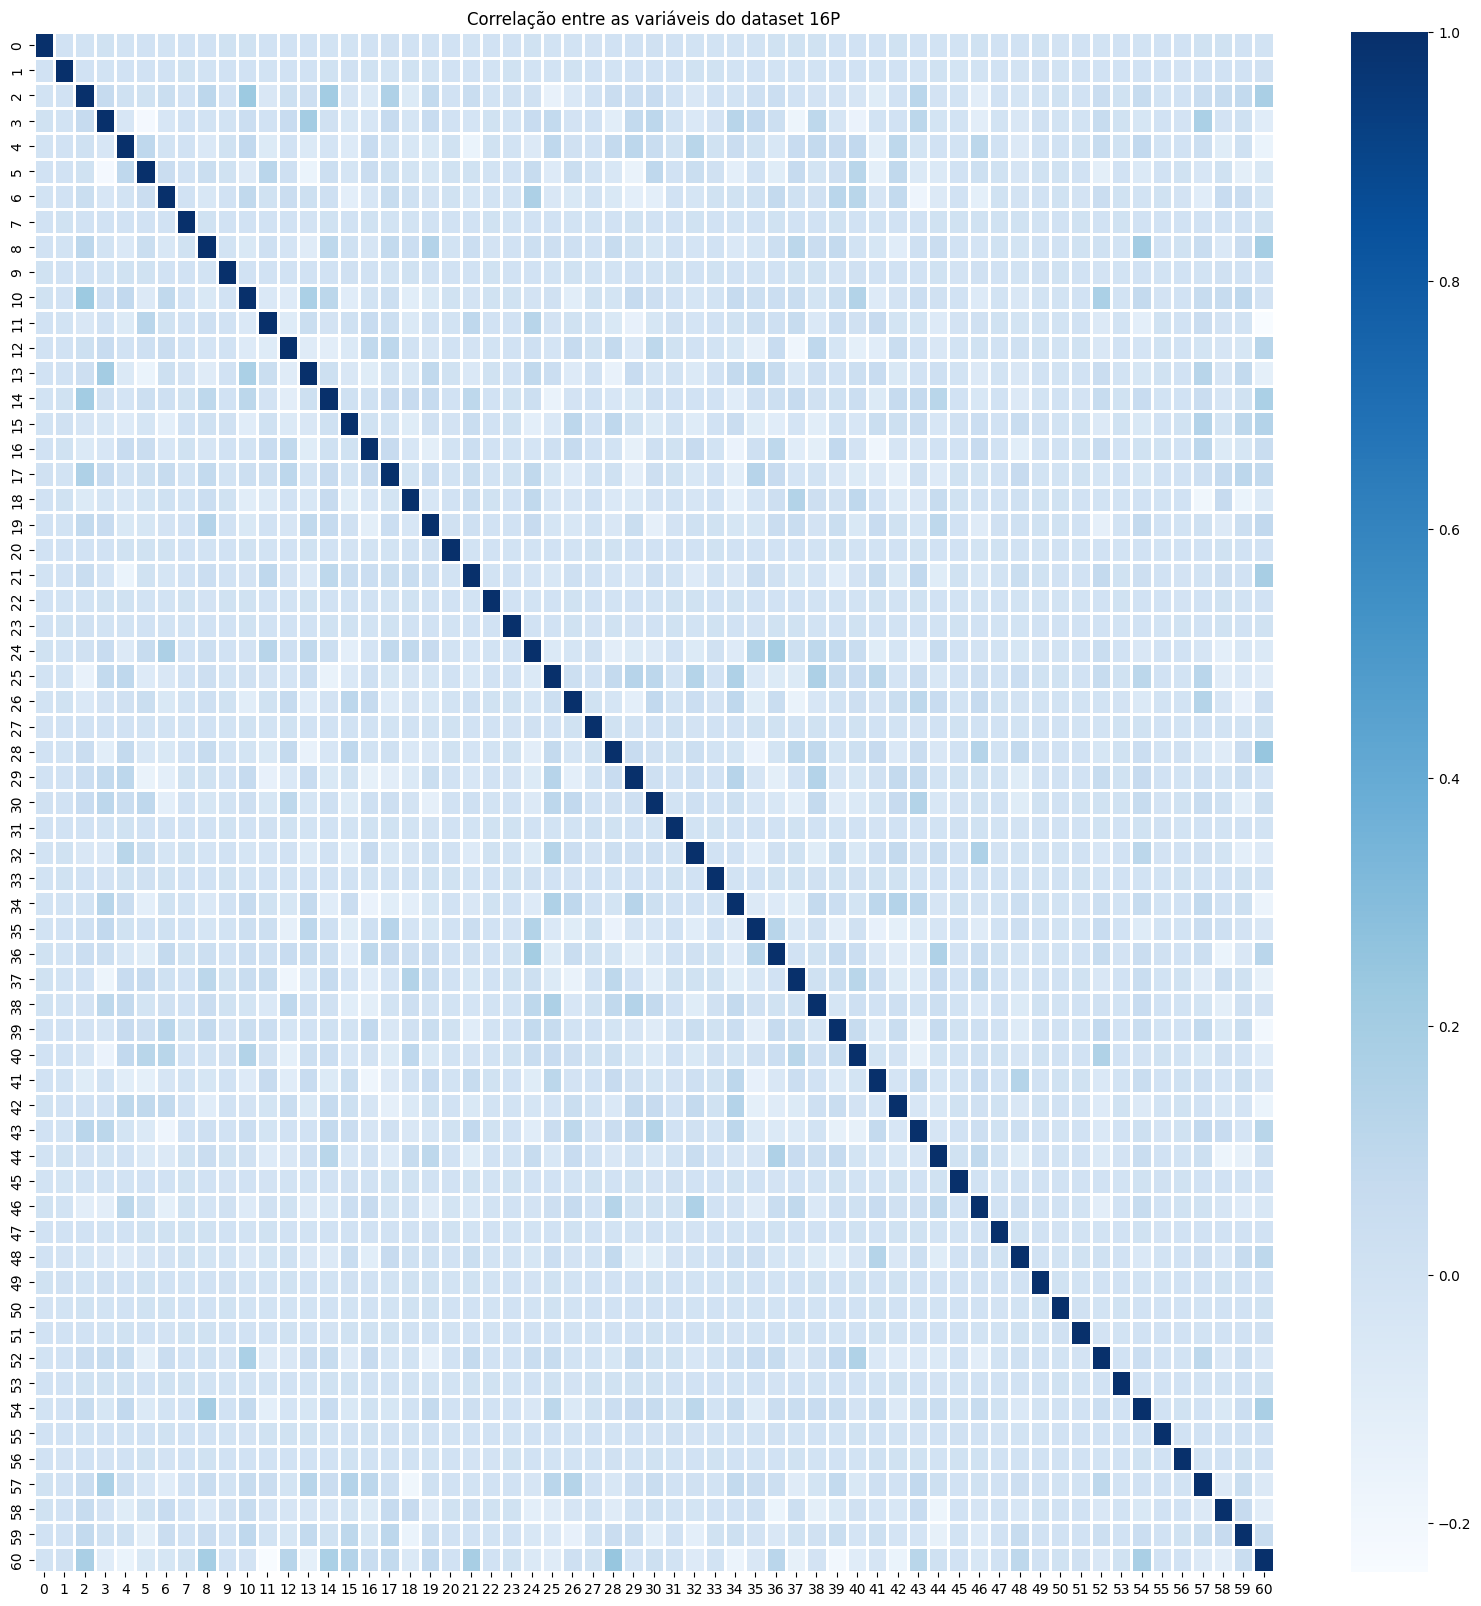

In [168]:
# Traçando um gráfico de correlação pra ver quais colunas tem maior correlação com outras.
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', fmt='.2f', linewidths=2)
plt.title('Correlação entre as variáveis do dataset 16P')
plt.show()
#Eu sei que isso ta horrivel foi só pra testar mesmo

In [169]:
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.001872 -0.003700  0.004305 -0.002460  0.000428 -0.002956   
1   0.001872  1.000000  0.001856 -0.003393 -0.001457  0.001447 -0.001180   
2  -0.003700  0.001856  1.000000  0.071982  0.014353  0.003865  0.042517   
3   0.004305 -0.003393  0.071982  1.000000 -0.040502 -0.210979 -0.037477   
4  -0.002460 -0.001457  0.014353 -0.040502  1.000000  0.094573 -0.002772   
5   0.000428  0.001447  0.003865 -0.210979  0.094573  1.000000  0.046232   
6  -0.002956 -0.001180  0.042517 -0.037477 -0.002772  0.046232  1.000000   
7   0.000989  0.004975  0.000060 -0.000051  0.002089 -0.001635 -0.000588   
8  -0.000872 -0.003611  0.106469 -0.004150 -0.059982  0.043979 -0.042213   
9   0.006430  0.001606 -0.001870 -0.002443  0.007197  0.002536 -0.000624   
10  0.003001 -0.000295  0.227912  0.037069  0.084896 -0.067939  0.093506   
11 -0.001011 -0.002744 -0.050652  0.001744 -0.071309  0.117079  0.005248   
12  0.000796

In [172]:
# vou ordenar pra facilitar a visualização
correlation_values = corr_matrix.unstack().sort_values(ascending=False)

pd.set_option('display.max_rows', None)

# Filtrar as correlações de uma coluna com ela propria
correlation_values = correlation_values[correlation_values.index.get_level_values(0) != correlation_values.index.get_level_values(1)]

print(correlation_values)

60  28    0.245569
28  60    0.245569
10  2     0.227912
2   10    0.227912
14  2     0.209051
2   14    0.209051
54  8     0.203847
8   54    0.203847
3   13    0.203231
13  3     0.203231
36  24    0.196917
24  36    0.196917
8   60    0.193288
60  8     0.193288
    21    0.187023
21  60    0.187023
60  2     0.181562
2   60    0.181562
60  54    0.177036
54  60    0.177036
10  13    0.176097
13  10    0.176097
52  10    0.175074
10  52    0.175074
14  60    0.173308
60  14    0.173308
57  3     0.171982
3   57    0.171982
24  6     0.169900
6   24    0.169900
38  25    0.168116
25  38    0.168116
32  46    0.162695
46  32    0.162695
2   17    0.160942
17  2     0.160942
36  44    0.160934
44  36    0.160934
25  34    0.157564
34  25    0.157564
40  52    0.155406
52  40    0.155406
30  43    0.147332
43  30    0.147332
24  35    0.145567
35  24    0.145567
40  10    0.143304
10  40    0.143304
18  37    0.142951
37  18    0.142951
34  42    0.142603
42  34    0.142603
15  60    0.

In [173]:
# Resetar o índice
correlation_values = correlation_values.reset_index()
correlation_values.columns = ['Variable1', 'Variable2', 'Correlation']

In [180]:
# Definir as faixas de correlação
faixas = {
    'correlação baixa': (0.3, 0.5),
    'média': (0.5, 0.7),
    'alta': (0.7, 0.99),
    'correlação baixa inversamente proporcional': (-0.5, -0.3),
    'média inversamente proporcional': (-0.7, -0.5),
    'alta inversamente proporcional': (-0.99, -0.7)
}

# Imprimir as correlações dentro de cada faixa
for faixa, (min_val, max_val) in faixas.items():
    correlacoes = corr_matrix[(corr_matrix >= min_val) & (corr_matrix < max_val)]
    if not correlacoes.empty:
        print(f'Faixa de correlação: {faixa}')
        for col1 in correlacoes.columns:
            for col2 in correlacoes.index:
                valor_correlacao = correlacoes.loc[col2, col1]
                if not pd.isna(valor_correlacao):
                    print(f'Variável {col1} e Variável {col2}: {valor_correlacao}')
        print('\n')

Faixa de correlação: correlação baixa


Faixa de correlação: média


Faixa de correlação: alta


Faixa de correlação: correlação baixa inversamente proporcional


Faixa de correlação: média inversamente proporcional


Faixa de correlação: alta inversamente proporcional




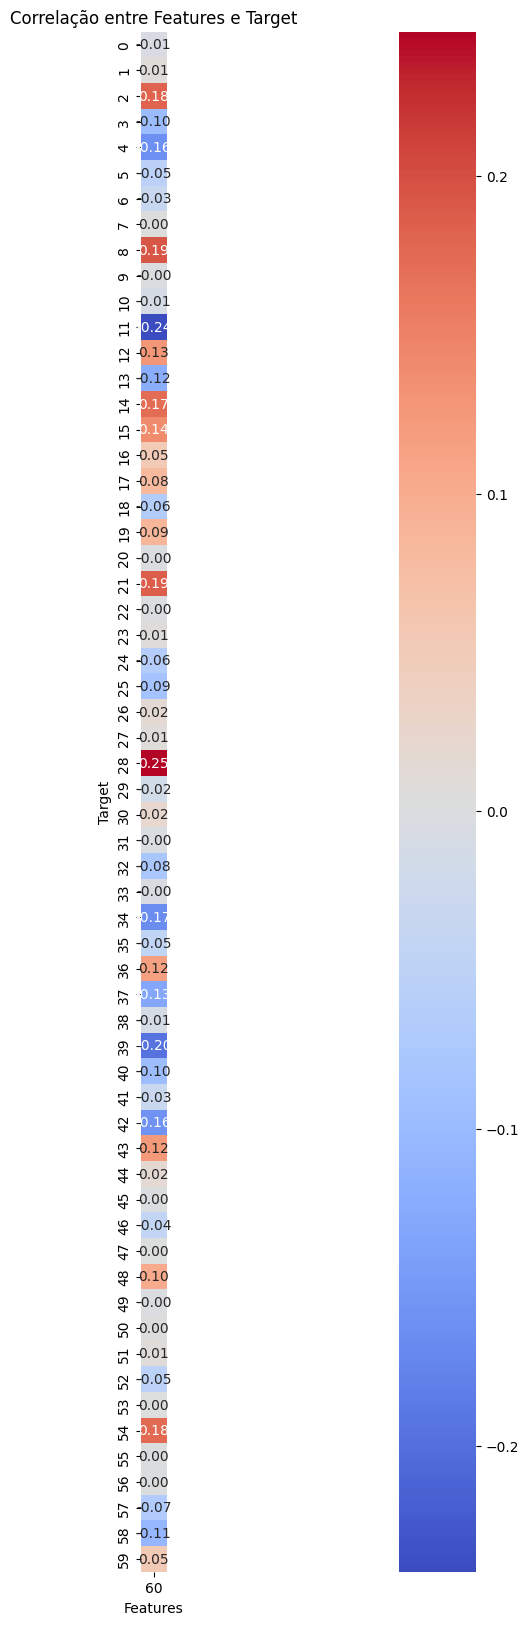

In [182]:
correlation_matrix_2 = df.corr()
correlation_with_target = correlation_matrix_2.iloc[:-1, -1]
plt.figure(figsize=(60, 20))
sns.heatmap(correlation_with_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Correlação entre Features e Target')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

In [183]:
print(correlation_with_target)

0    -0.006053
1     0.007773
2     0.181562
3    -0.098356
4    -0.160588
5    -0.052378
6    -0.033947
7     0.004137
8     0.193288
9    -0.000456
10   -0.011952
11   -0.239620
12    0.126825
13   -0.121279
14    0.173308
15    0.139932
16    0.053297
17    0.080624
18   -0.063762
19    0.087765
20   -0.001402
21    0.187023
22   -0.000995
23    0.006375
24   -0.062750
25   -0.085554
26    0.017497
27    0.006818
28    0.245569
29   -0.016967
30    0.022705
31   -0.002834
32   -0.079006
33   -0.004767
34   -0.165623
35   -0.046298
36    0.115173
37   -0.131248
38   -0.011256
39   -0.196082
40   -0.096761
41   -0.029515
42   -0.159757
43    0.122697
44    0.016379
45    0.000516
46   -0.042177
47    0.001873
48    0.102036
49   -0.002260
50    0.004098
51    0.008036
52   -0.050353
53    0.002668
54    0.177036
55    0.000980
56    0.000620
57   -0.068480
58   -0.106624
59    0.054334
Name: 60, dtype: float64


In [184]:
# Criar dicionário para armazenar as features em cada faixa
features_por_faixa = {faixa: [] for faixa in faixas}

# Iterar sobre a série de correlação
for feature, correlacao in correlation_with_target.items():
    for faixa, (minimo, maximo) in faixas.items():
        if minimo <= correlacao < maximo:
            features_por_faixa[faixa].append(feature)

# Exibir as features em cada faixa
for faixa, features in features_por_faixa.items():
    print(f'Faixa de correlação: {faixa}')
    print(f'Features: {features}')
    print('\n')


Faixa de correlação: correlação baixa
Features: []


Faixa de correlação: média
Features: []


Faixa de correlação: alta
Features: []


Faixa de correlação: média inversamente proporcional
Features: []


Faixa de correlação: alta inversamente proporcional
Features: []




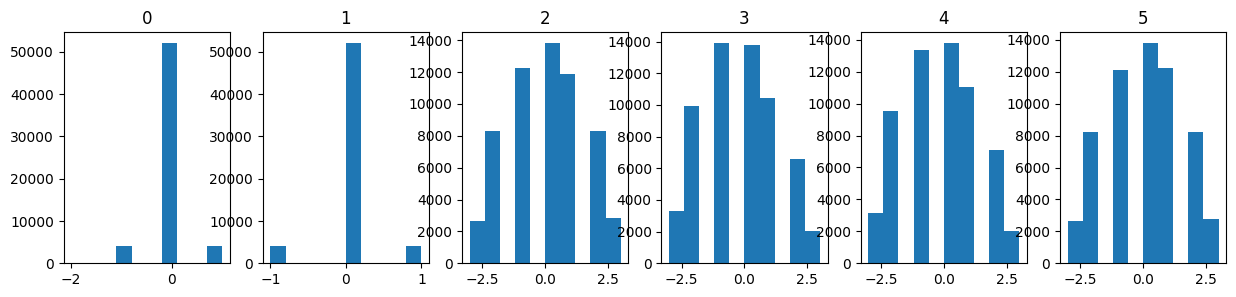

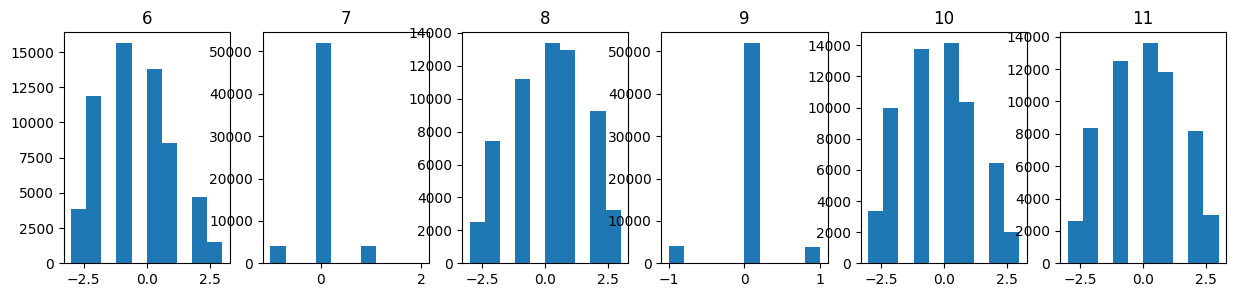

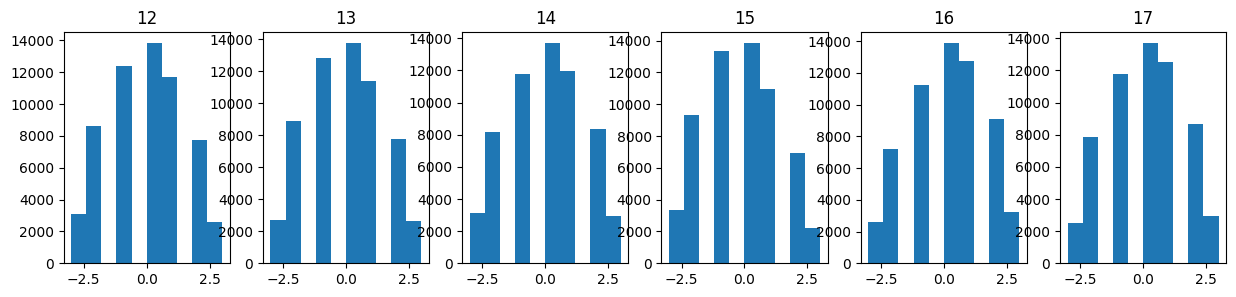

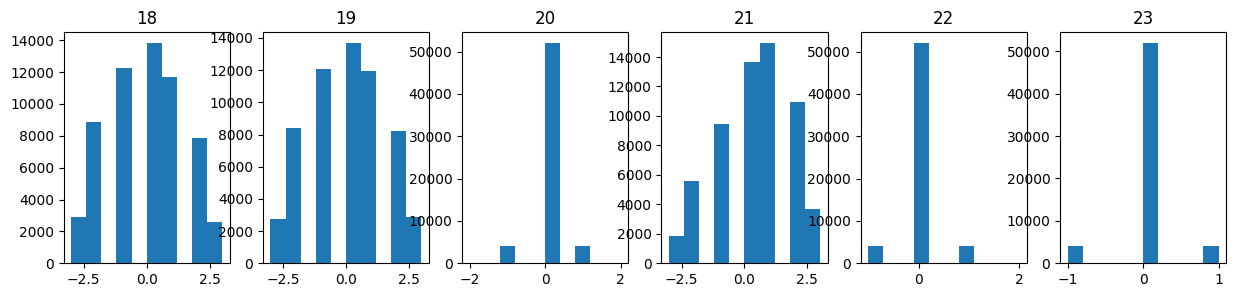

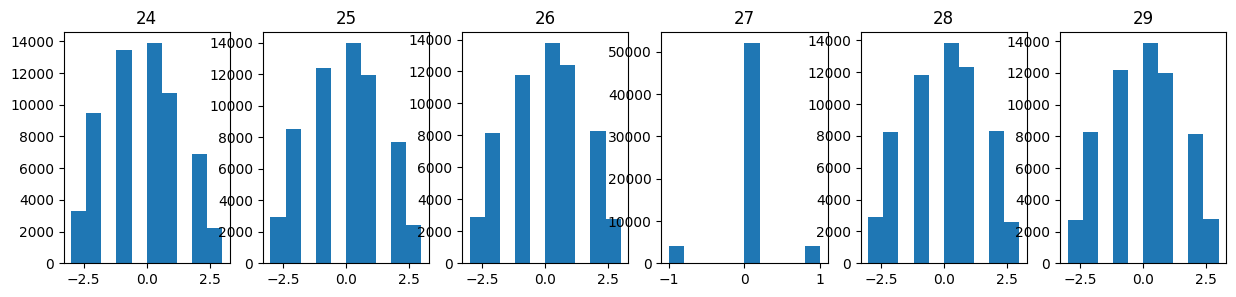

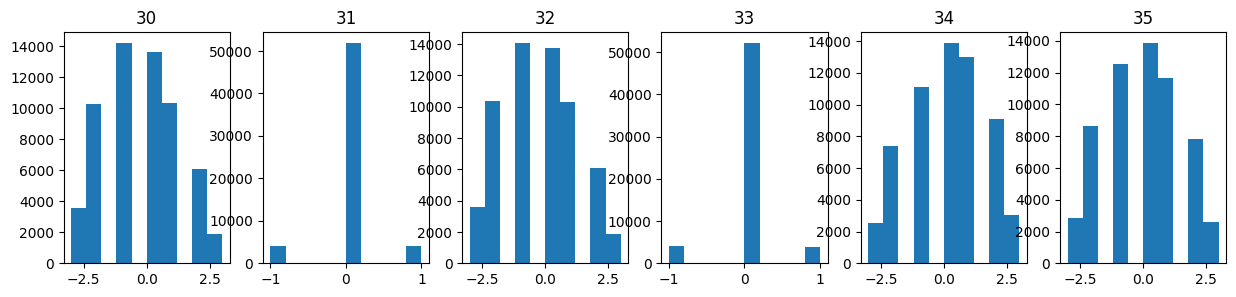

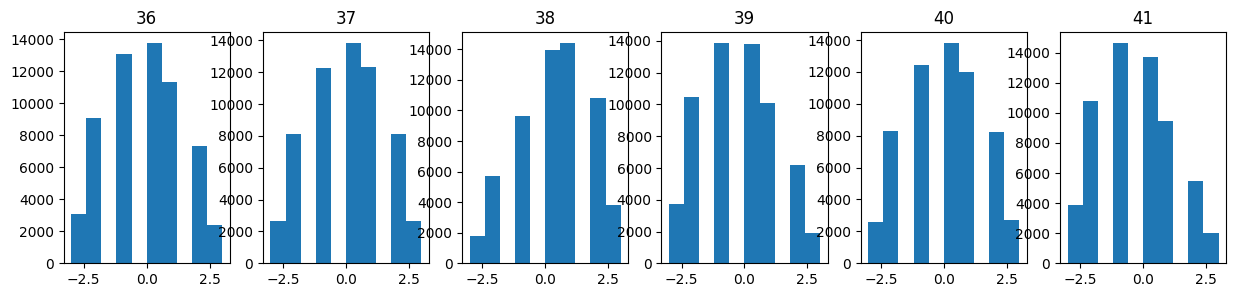

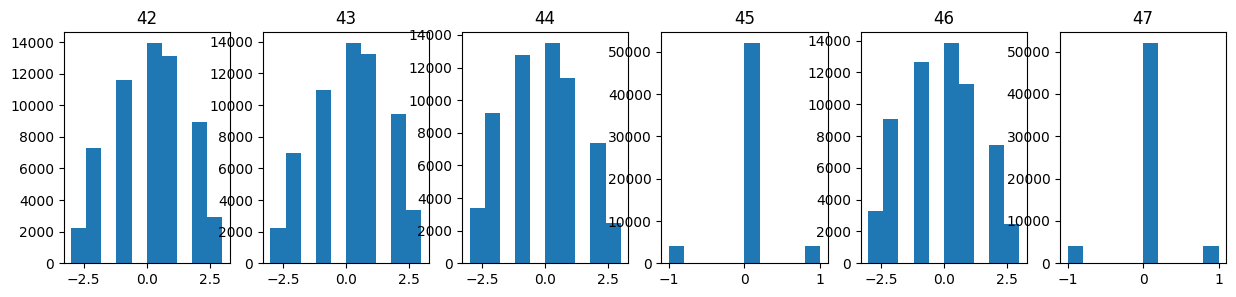

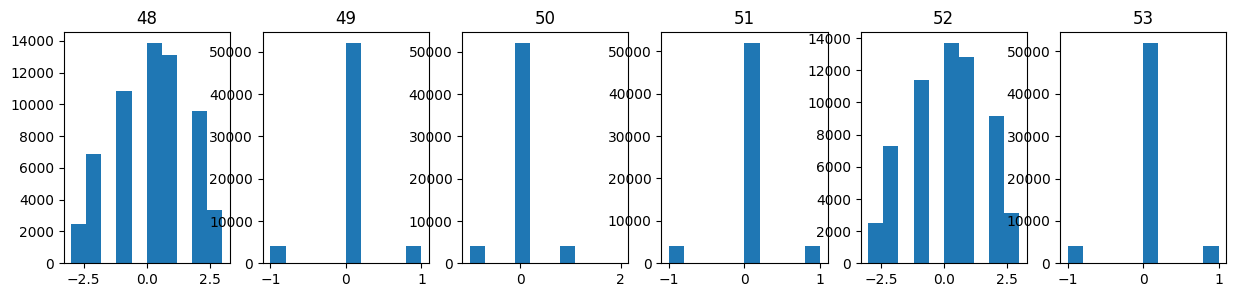

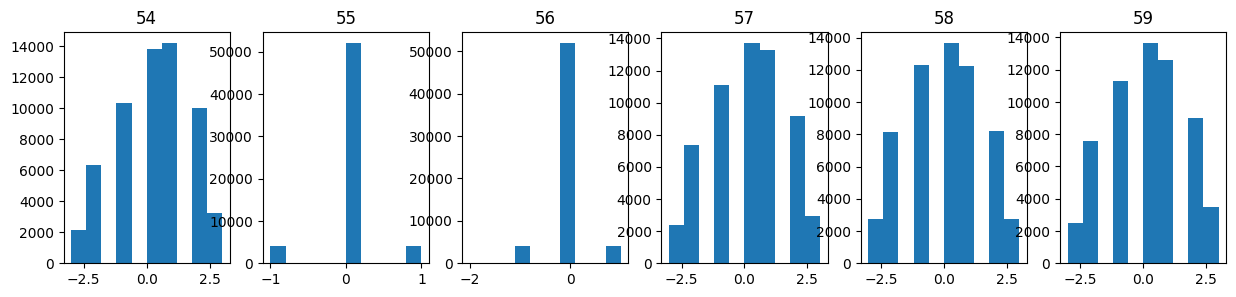

In [185]:
# Plotando histogramas para cada personalidade
for i in range(10):
    fig, axs = plt.subplots(1, 6, figsize=(15, 3))
    for j in range(6):
        axs[j].hist(df.iloc[:, i*6 + j].dropna())
        axs[j].set_title(j + i*6) #Como os títulos sao muito grandes, decidi mudar para o numero da coluna

#Não estou gostando no estilo do histograma, vou mudar depois
plt.show()